1D

In [17]:
import numpy as np
import time

def simulate_heat_transfer(N, T0, TN, max_iter, tolerance=None):
    """
    Symulacja transferu ciepła w jednowymiarowym pręcie metodą różnic skończonych.

    Parametry:
    N - liczba węzłów siatki
    T0 - temperatura na lewym końcu (Brzeg)
    TN - temperatura na prawym końcu (Brzeg)
    max_iter - maksymalna liczba iteracji
    tolerance - opcjonalne kryterium zbieżności (domyśl|nie brak)

    Zwraca:
    temperatures - lista temperatur w każdym węźle siatki
    iter_count - liczba wykonanych iteracji
    execution_time - czas wykonania symulacji
    """
    # Inicjalizacja temperatury w siatce
    T = np.linspace(T0, TN, N)

    start_time = time.time()

    for iter_count in range(max_iter):
        T_old = T.copy()

        # Iteracyjne uaktualnianie temperatury w węzłach wewnętrznych
        for i in range(1, N - 1):
            T[i] = 0.5 * (T_old[i - 1] + T_old[i + 1])

        # Kryterium zbieżności
        if tolerance is not None:
            diff = np.max(np.abs(T - T_old))
            if diff < tolerance:
                break

    execution_time = time.time() - start_time
    return T, iter_count + 1, execution_time


In [18]:
N = 50
T0 = 150
TN = 50
max_iter = 1000
tolerance = 0.5

temperatures, iterations, exec_time = simulate_heat_transfer(N, T0, TN, max_iter, tolerance)
print(f"Liczba iteracji: {iterations}")
print(f"Czas wykonania: {exec_time:.6f} s")
print("Rozkład temperatury:", temperatures)


Liczba iteracji: 1
Czas wykonania: 0.000000 s
Rozkład temperatury: [150.         147.95918367 145.91836735 143.87755102 141.83673469
 139.79591837 137.75510204 135.71428571 133.67346939 131.63265306
 129.59183673 127.55102041 125.51020408 123.46938776 121.42857143
 119.3877551  117.34693878 115.30612245 113.26530612 111.2244898
 109.18367347 107.14285714 105.10204082 103.06122449 101.02040816
  98.97959184  96.93877551  94.89795918  92.85714286  90.81632653
  88.7755102   86.73469388  84.69387755  82.65306122  80.6122449
  78.57142857  76.53061224  74.48979592  72.44897959  70.40816327
  68.36734694  66.32653061  64.28571429  62.24489796  60.20408163
  58.16326531  56.12244898  54.08163265  52.04081633  50.        ]


Liczba iteracji: 1
Czas wykonania: 0.001023 s
Rozkład temperatury: [150.         147.95918367 145.91836735 143.87755102 141.83673469
 139.79591837 137.75510204 135.71428571 133.67346939 131.63265306
 129.59183673 127.55102041 125.51020408 123.46938776 121.42857143
 119.3877551  117.34693878 115.30612245 113.26530612 111.2244898
 109.18367347 107.14285714 105.10204082 103.06122449 101.02040816
  98.97959184  96.93877551  94.89795918  92.85714286  90.81632653
  88.7755102   86.73469388  84.69387755  82.65306122  80.6122449
  78.57142857  76.53061224  74.48979592  72.44897959  70.40816327
  68.36734694  66.32653061  64.28571429  62.24489796  60.20408163
  58.16326531  56.12244898  54.08163265  52.04081633  50.        ]


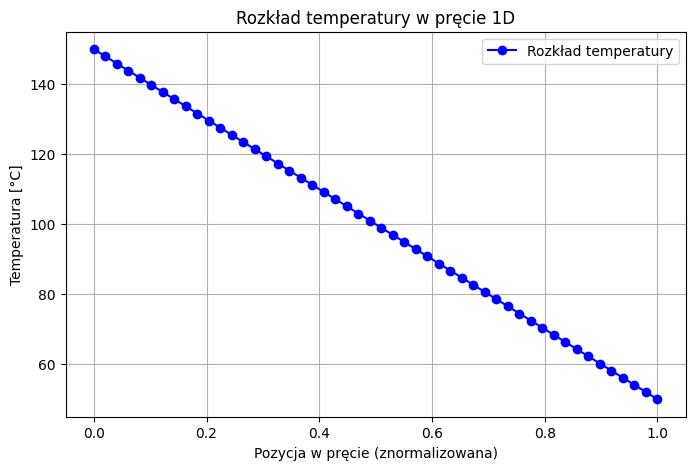

In [20]:
import matplotlib.pyplot as plt

def plot_temperature_distribution(temperatures, N):
    x = np.linspace(0, 1, N) 
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, temperatures, marker='o', linestyle='-', color='b', label="Rozkład temperatury")
    plt.xlabel("Pozycja w pręcie (znormalizowana)")
    plt.ylabel("Temperatura [°C]")
    plt.title("Rozkład temperatury w pręcie 1D")
    plt.legend()
    plt.grid()
    plt.show()

# Uruchomienie symulacji
N = 50
T0 = 150
TN = 50
max_iter = 1000
tolerance = 0.5

temperatures, iterations, exec_time = simulate_heat_transfer(N, T0, TN, max_iter, tolerance)

# Wyświetlenie wyników
print(f"Liczba iteracji: {iterations}")
print(f"Czas wykonania: {exec_time:.6f} s")
print("Rozkład temperatury:", temperatures)

# Rysowanie wykresu
plot_temperature_distribution(temperatures, N)


2D

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

def simulate_heat_transfer_2D(Nx, Ny, TU, TD, TL, TR, max_iter, tolerance=None):
    """
    Symulacja dwuwymiarowego, stacjonarnego przewodnictwa ciepła metodą różnic skończonych.

    Parametry:
    Nx, Ny - liczba węzłów siatki w kierunku X i Y
    TU, TD, TL, TR - temperatury na górnej (Up), dolnej (Down), lewej (Left) i prawej (Right) krawędzi
    max_iter - maksymalna liczba iteracji
    tolerance - opcjonalne kryterium zbieżności

    Zwraca:
    T - macierz temperatur w siatce
    iter_count - liczba wykonanych iteracji
    execution_time - czas wykonania symulacji
    avg_iter_time - średni czas pojedynczej iteracji
    """
    # Inicjalizacja siatki temperatur
    T = np.ones((Nx, Ny)) * (TU + TD + TL + TR) / 4
    T[0, :] = TU  # Górna krawędź
    T[-1, :] = TD  # Dolna krawędź
    T[:, 0] = TL  # Lewa krawędź
    T[:, -1] = TR  # Prawa krawędź

    start_time = time.time()
    iter_times = []

    for iter_count in range(max_iter):
        iter_start = time.time()
        T_old = T.copy()

        # Iteracyjne uaktualnianie temperatury w wewnętrznych punktach siatki
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                T[i, j] = 0.25 * (T_old[i+1, j] + T_old[i-1, j] + T_old[i, j+1] + T_old[i, j-1])

        iter_end = time.time()
        iter_times.append(iter_end - iter_start)

        # Kryterium zbieżności
        diff = np.max(np.abs(T - T_old))
        if tolerance is not None and diff < tolerance:
            break

    execution_time = time.time() - start_time
    avg_iter_time = np.mean(iter_times) if iter_times else 0

    return T, iter_count + 1, execution_time, avg_iter_time


In [ ]:
# Parametry testowe
Nx, Ny = 25, 25  
TU, TD, TL, TR = 300, 100, 200, 0 
max_iter = 1000
tolerance = 0.5

# Uruchomienie symulacji
T, iterations, exec_time, avg_iter_time = simulate_heat_transfer_2D(Nx, Ny, TU, TD, TL, TR, max_iter, tolerance)

# Wyświetlenie wyników
print(f"Liczba iteracji: {iterations}")
print(f"Czas wykonania: {exec_time:.6f} s")
print(f"Średni czas jednej iteracji: {avg_iter_time:.6f} s")


Liczba iteracji: 69
Czas wykonania: 0.113055 s
Średni czas jednej iteracji: 0.001549 s


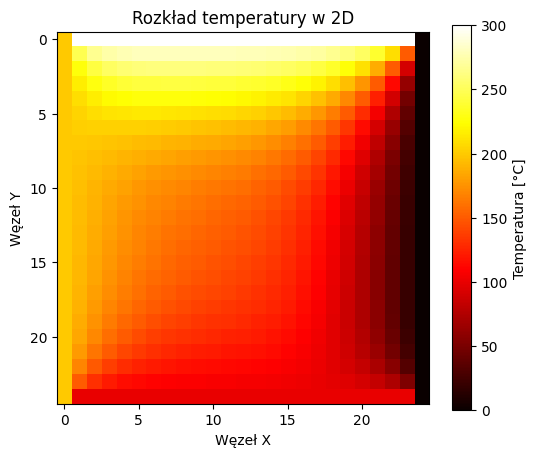

In [ ]:
def plot_heatmap(T):
    plt.figure(figsize=(6, 5))
    plt.imshow(T, cmap='hot', interpolation='nearest')
    plt.colorbar(label="Temperatura [°C]")
    plt.title("Rozkład temperatury w 2D")
    plt.xlabel("Węzeł X")
    plt.ylabel("Węzeł Y")
    plt.show()

plot_heatmap(T)
